In [2]:
# Einlesen der Daten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/Daten_clean.csv")

In [3]:
# einen ersten Überblick über die Daten verschaffen
df.describe()

,length_title,length_description,view_count,like_count,comment_count,channel_view_count,channel_sub_count,channel_video_count,days_online,published_month,duration_sec
count,1175.000000,1175.000000,1.175000e+03,1.175000e+03,1175.000000,1.175000e+03,1.175000e+03,1175.000000,1175.000000,1175.000000,1175.000000
mean,52.227234,1014.094468,7.851528e+06,1.444240e+05,2303.240851,1.672334e+09,2.833777e+06,2753.342979,925.043404,5.914043,869.809362
std,20.788141,1055.877891,3.164988e+07,5.561827e+05,7717.166488,9.881465e+09,1.107927e+07,10868.162872,1076.801526,3.784925,2739.246335
min,5.000000,0.000000,3.800000e+01,0.000000e+00,0.000000,1.891600e+04,4.900000e+01,2.000000,1.000000,1.000000,0.000000
25%,37.000000,262.000000,9.899250e+04,1.739000e+03,72.500000,1.705050e+07,6.680000e+04,195.000000,231.000000,2.000000,71.000000
50%,49.000000,711.000000,5.698600e+05,1.129600e+04,360.000000,1.300853e+08,3.590000e+05,498.000000,528.000000,6.000000,308.000000
75%,66.000000,1376.500000,3.154468e+06,6.116600e+04,1410.500000,7.704883e+08,1.635000e+06,1457.500000,1195.000000,9.000000,765.000000
max,100.000000,4997.000000,4.520626e+08,8.051681e+06,141824.000000,2.394637e+11,2.580000e+08,159692.000000,6024.000000,12.000000,51975.000000


In [4]:
# Relativierung der Views nach Anzahl der Tage, die das Video online ist
df["views_per_day"] = df["view_count"] / df["days_online"]

<Axes: xlabel='length_title', ylabel='views_per_day'>

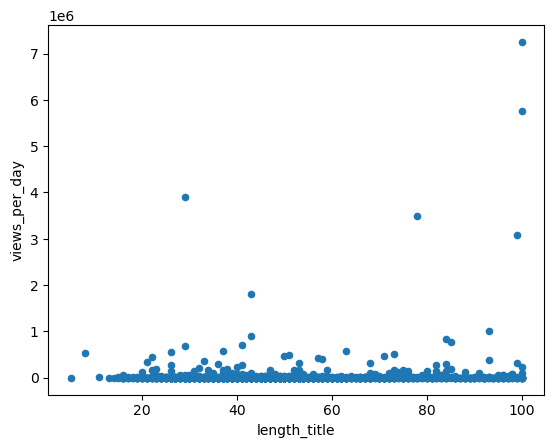

In [5]:
# Erste Daten-Exploration, welche Faktoren einen Einfluss auf die Views haben könnten

# pandas-Scatterplot der Views pro Tag und Titellänge
df.plot.scatter(x="length_title", y="views_per_day") # nur schwache Korrelation erkennbar

<Axes: xlabel='channel_sub_count', ylabel='views_per_day'>

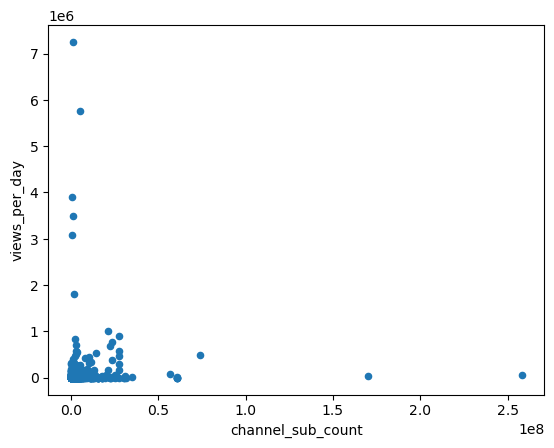

In [6]:
# pandas-Scatterplot der Views pro Tag und channel subscribers
df.plot.scatter(x="channel_sub_count", y="views_per_day") # Korrelation erkennbar: erster Ansatz für die Regressionsanalyse, je mehr Channel Abonnenten, desto mehr Views?

<Axes: xlabel='duration_sec', ylabel='views_per_day'>

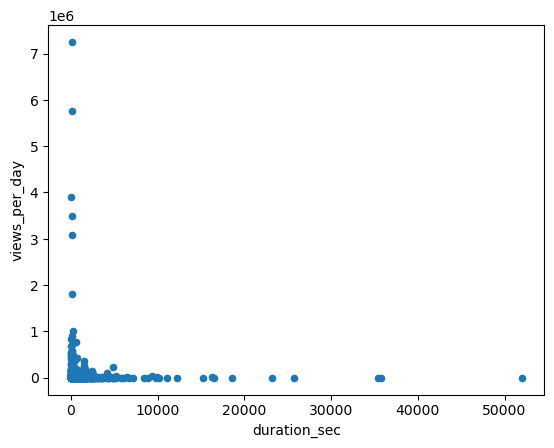

In [7]:
# pandas-Scatterplot der Views pro Tag und videodauer
df.plot.scatter(x="duration_sec", y="views_per_day")  # Korrelation erkennbar: Zweiter Ansatz für die Regressionsanalyse, je länger das Video, desto mehr Views?

<Axes: xlabel='length_description', ylabel='views_per_day'>

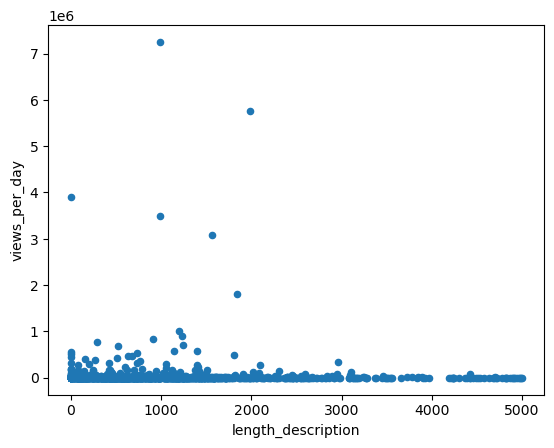

In [8]:
# pandas-Scatterplot der Views pro Tag und Beschreibungslänge
df.plot.scatter(x="length_description", y="views_per_day") # keine Korrelation erkennbar

In [10]:
# Lineares Regressionsmodell mit Statsmodels
import statsmodels.api as sm

# Der Datensatz für die Regressionsanalyse wird eingelesen
df = pd.read_csv("./data/Daten_analysis.csv")

# Natürlichen Logarithmus auf die abhängige Variable anwenden
df['view_count_ln'] = np.log(df['view_count'])

#### Erste Regression ####

# Spalten, die in der ersten Regression ausgeschlossen werden sollen
excluded_columns = ['view_count_ln', 'view_count', 'cat_29', 'country_US'] #Cat_29 und country_US sind die Dummy-Variablen für die Kategorien 'Film & Animation' und 'USA' diese werden ausgeschlossen da ansonsten Multikollinearität vorliegt

# Alle Spalten außer den ausgeschlossenen auswählen und in die Designmatrix aufnehmen
X = sm.add_constant(df.loc[:, ~df.columns.isin(excluded_columns)])

# Modell erstellen
model1 = sm.OLS(df['view_count_ln'], X)

# Modell anpassen
results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          view_count_ln   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.23e-92
Time:                        19:22:44   Log-Likelihood:                -2513.4
No. Observations:                1175   AIC:                             5207.
Df Residuals:                    1085   BIC:                             5663.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
length_title            

In [11]:
#### Zweite Regression ####

# Spalten, die in der zweiten Regression ausgeschlossen werden sollen
excluded_columns = ['view_count_ln', 'view_count', 'cat_29'] + [col for col in df.columns if col.startswith('country_')] # Es erfolgt die Regression ohne die Dummy Variablen für Länder

# Alle Spalten außer den ausgeschlossenen auswählen und in die Designmatrix aufnehmen
X = sm.add_constant(df.loc[:, ~df.columns.isin(excluded_columns)])

# Modell erstellen
model2 = sm.OLS(df['view_count_ln'], X)

# Modell anpassen
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          view_count_ln   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     28.46
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          4.15e-105
Time:                        19:22:49   Log-Likelihood:                -2578.2
No. Observations:                1175   AIC:                             5210.
Df Residuals:                    1148   BIC:                             5347.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
length_title            

In [12]:
#### Dritte Regression ####

# Spalten, die in der dritten Regression ausgeschlossen werden sollen
excluded_columns = ['view_count_ln', 'view_count'] + [col for col in df.columns if col.startswith('country_')] + [col for col in df.columns if col.startswith('cat_')] # Es erfolgt die Regression ohne die Dummy Variablen für Länder

# Alle Spalten außer den ausgeschlossenen auswählen und in die Designmatrix aufnehmen
X = sm.add_constant(df.loc[:, ~df.columns.isin(excluded_columns)])

# Modell erstellen
model3 = sm.OLS(df['view_count_ln'], X)

# Modell anpassen
results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          view_count_ln   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     47.45
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           5.35e-92
Time:                        19:22:55   Log-Likelihood:                -2636.2
No. Observations:                1175   AIC:                             5298.
Df Residuals:                    1162   BIC:                             5364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
length_title            0.0032    

In [17]:
### Fazit der Regressionsanalyse ###

# mit einem Maximalen adjusted R2 von 0,411 in der ersten Regression ist die Erklärungskraft des des Modells generell nicht sehr hoch. 
# Es wird in den Regressionen 2 und 3 versucht, die Variablen zuerst um die Länder und dann um die Kategorien zu reduzieren. Da hier jedoch der adjusted R2 stark sinkt, gehen wir davon aus, dass die Länder und Kategorien wichtig für die Erklärung der Views sind. Es wird somit die erste Regression als die beste bewertet

# Ausgabe der Variablen inkl. coeffizienten, die auf dem 1% Signifikanzniveau signifikant sind
results.params[results.pvalues < 0.01]

# Zusammenfassung der Ergebnisse

# Die Variable mit dem höchsten Einfluss auf die Anzahl der Views ist Dummy-Variable, die beschreibt ob ein Video öffentlich ist oder nicht. Das ist sehr intuitiv, da nicht öffentliche Videos nicht von allen Nutzern gesehen werden können. Die Nullhypothese, dass diese Variable keinen Einfluss auf die Anzahl der Views hat kann auf dem 1% Signifikanzniveau abgelehnt werden

# folgende weitere Nullhypothesen dass Variablen X keinen Einfluss auf die Anzahl der Views haben können auf dem 1% Signifikanzniveau abgelehnt werden: siehe results.params[results.pvalues < 0.01]

# Die Variablen für Kategorien erscheinen aufgrund des vergleichsweise hohen Koeffizienten ebenfalls wichtig für die Erklärung der Views.

length_description     -1.796932e-04
like_count              1.314934e-06
comment_count           5.467446e-05
channel_view_count     -8.199654e-11
channel_sub_count       8.853363e-08
days_online             4.372665e-04
published_month         8.918473e-02
cat_Comedy              3.682134e+00
cat_Entertainment       3.476178e+00
cat_Film & Animation    3.733936e+00
cat_Music               4.059869e+00
caption_True            5.305333e-01
licensed_True           1.057637e+00
privacy_public          7.942874e+00
dtype: float64